In [15]:
import pandas as pd
import numpy as np
from collections import defaultdict
from collections import OrderedDict
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def get_sentiment_change_mean(path):
    df_conversations = pd.read_csv(path,
                                 dtype={'id_str': 'str',
                                        'in_reply_to_screen_name':'str',
                                        'in_reply_to_status_id_str': 'str',
                                        'in_reply_to_user_id_str': 'str',
                                        'text': 'str',
                                        'timestamp_ms': 'float64',
                                        'user.id_str': 'str',
                                        'user.screen_name': 'str',
                                        'group_id': 'int'})
    
    # Add the second index for each reply within each group
    df_conversations['reply_index'] = df_conversations.groupby('group_index').cumcount() + 1
    

    # Set the two indexes for the DataFrame
    df_conversations.set_index(['group_index'], inplace=True)

    analyzer = SentimentIntensityAnalyzer()

    # Define a function to get the compound score for a sentence. Its range is from -1 to 1, with -1 being negative and 1 being positive. The range [-0.05, 0.05] is considered as neutral
    def get_sentiment_score(text):
        sentiment = analyzer.polarity_scores(text)
        return sentiment['compound']


    df_conversations['sentiment'] = df_conversations['text'].apply(get_sentiment_score)
    
    # Grouping by the first index of the MultiIndex
    grouped = df_conversations.groupby(level=0)

    # Filter conversations with at least 3 tweets
    filtered = grouped.filter(lambda x: len(x) >= 3)
    
    # Get the first level of the MultiIndex
    first_index = filtered.index.get_level_values(0)
    first_index_list = first_index.tolist()
    
    # Count number of tweets per convo, stored in dictionary
    consecutive_counter = {i : first_index_list.count(i) for i in first_index_list}
    # Create a sorted and ordered dictionary of length keys and convo index values
    res = defaultdict(list)
    for key, val in sorted(consecutive_counter.items()):
        res[val].append(key)
    dict1 = OrderedDict(sorted(res.items()))
    
    
    key_list = list(dict1.keys())
    value_list = list(dict1.values())
 
    sentiment_list = {}
    for keys in range(0, len(key_list)):
        for vals in value_list[keys]:
            temp = []
            for _, id_variable in filtered.loc[vals].iterrows():
                sentiment_variable = id_variable['sentiment']
                for index, value in filtered.loc[vals][::-1].iterrows():
                    if (value['user.id_str'] != '18332190'):
                        if (value['id_str'] == id_variable['id_str']):
                            break
                        if (value['user.id_str'] == id_variable['user.id_str']):
                            temp.append(value['sentiment'] - sentiment_variable)
                            break
                sentiment_list[key_list[keys]] = (sum(temp))

    sent_df0 = pd.DataFrame([sentiment_list])
    sent_df = sent_df0.transpose()
    return sent_df

In [4]:
get_sentiment_change_mean("C:\\Users\\20211487\\index_testing\\conversations_total_easyjet.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\20211487\\index_testing\\conversations_total_easyjet.csv'

In [26]:
df_BA = get_sentiment_change_mean("C:\\Users\\20225009\\Documents\\DBL Data Challenge\\Database\\conversations_total_BA.csv")
df_BA = df_BA.reset_index()

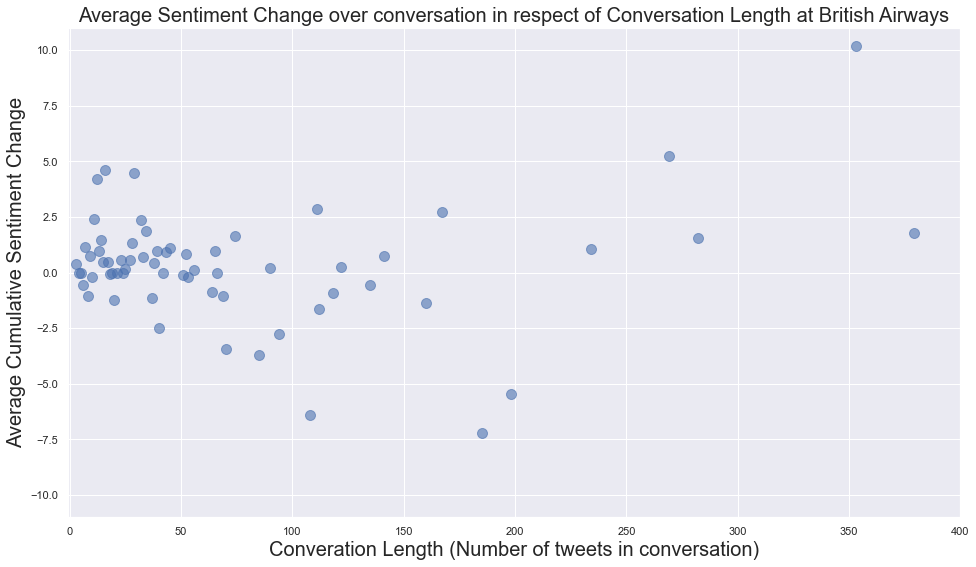

In [65]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # also improves the look of plots
sns.set()              # set Seaborn defaults
plt.rcParams['figure.figsize'] = [10, 5]   # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

plot_BA = df_BA.plot(kind='scatter', x='index', y=0, c="b",figsize = (16,9), s = 100, alpha = 0.6)
plot_BA.set_title('Average Sentiment Change over conversation in respect of Conversation Length at British Airways', size = 20)
plot_BA.set_xlabel('Converation Length (Number of tweets in conversation)', size = 20)
plot_BA.set_ylabel('Average Cumulative Sentiment Change', size = 20)
plot_BA.set_xlim(-1, 400)
plot_BA.set_ylim(-11, 11)

plt.savefig("Scatter_BA3.png");

In [38]:
df_KLM = get_sentiment_change_mean("C:\\Users\\20225009\\Documents\\DBL Data Challenge\\Database\\conversations_total_KLM.csv")
df_KLM = df_KLM.reset_index()

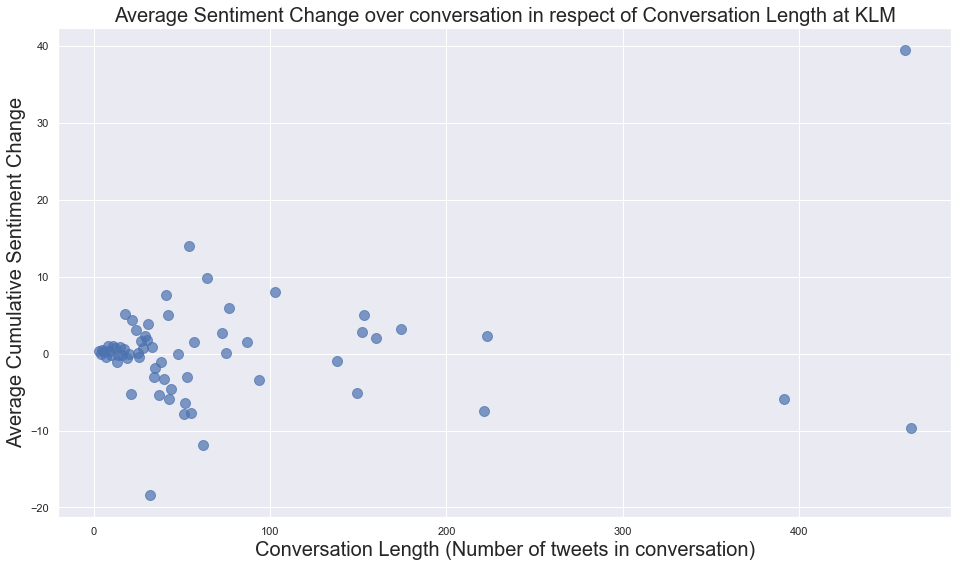

In [68]:
plot_KLM = df_KLM.plot(kind='scatter', x='index', y=0, c="b", s = 100, figsize=(16, 9), alpha = 0.7)
plot_KLM.set_title('Average Sentiment Change over conversation in respect of Conversation Length at KLM', size = 20)
plot_KLM.set_xlabel('Conversation Length (Number of tweets in conversation)', size =20)
plot_KLM.set_ylabel('Average Cumulative Sentiment Change', size = 20)
#plot_KLM.set_xlim(-1, 250)
#plot_KLM.set_ylim(-20,20)
plt.savefig("Scatter_KLM1.png");

In [23]:
df_AF = get_sentiment_change_mean("C:\\Users\\20225009\\Documents\\DBL Data Challenge\\Database\\conversations_total_AirFrance.csv")
df_AF = df_AF.reset_index()
df_AF

,index,0
0,3,-0.1531
1,4,1.1373
2,5,-0.1044
3,6,0.3967
4,7,-0.1012
5,8,-0.0461
6,9,-0.0974
7,10,0.3120
8,11,0.5233
9,12,1.2467


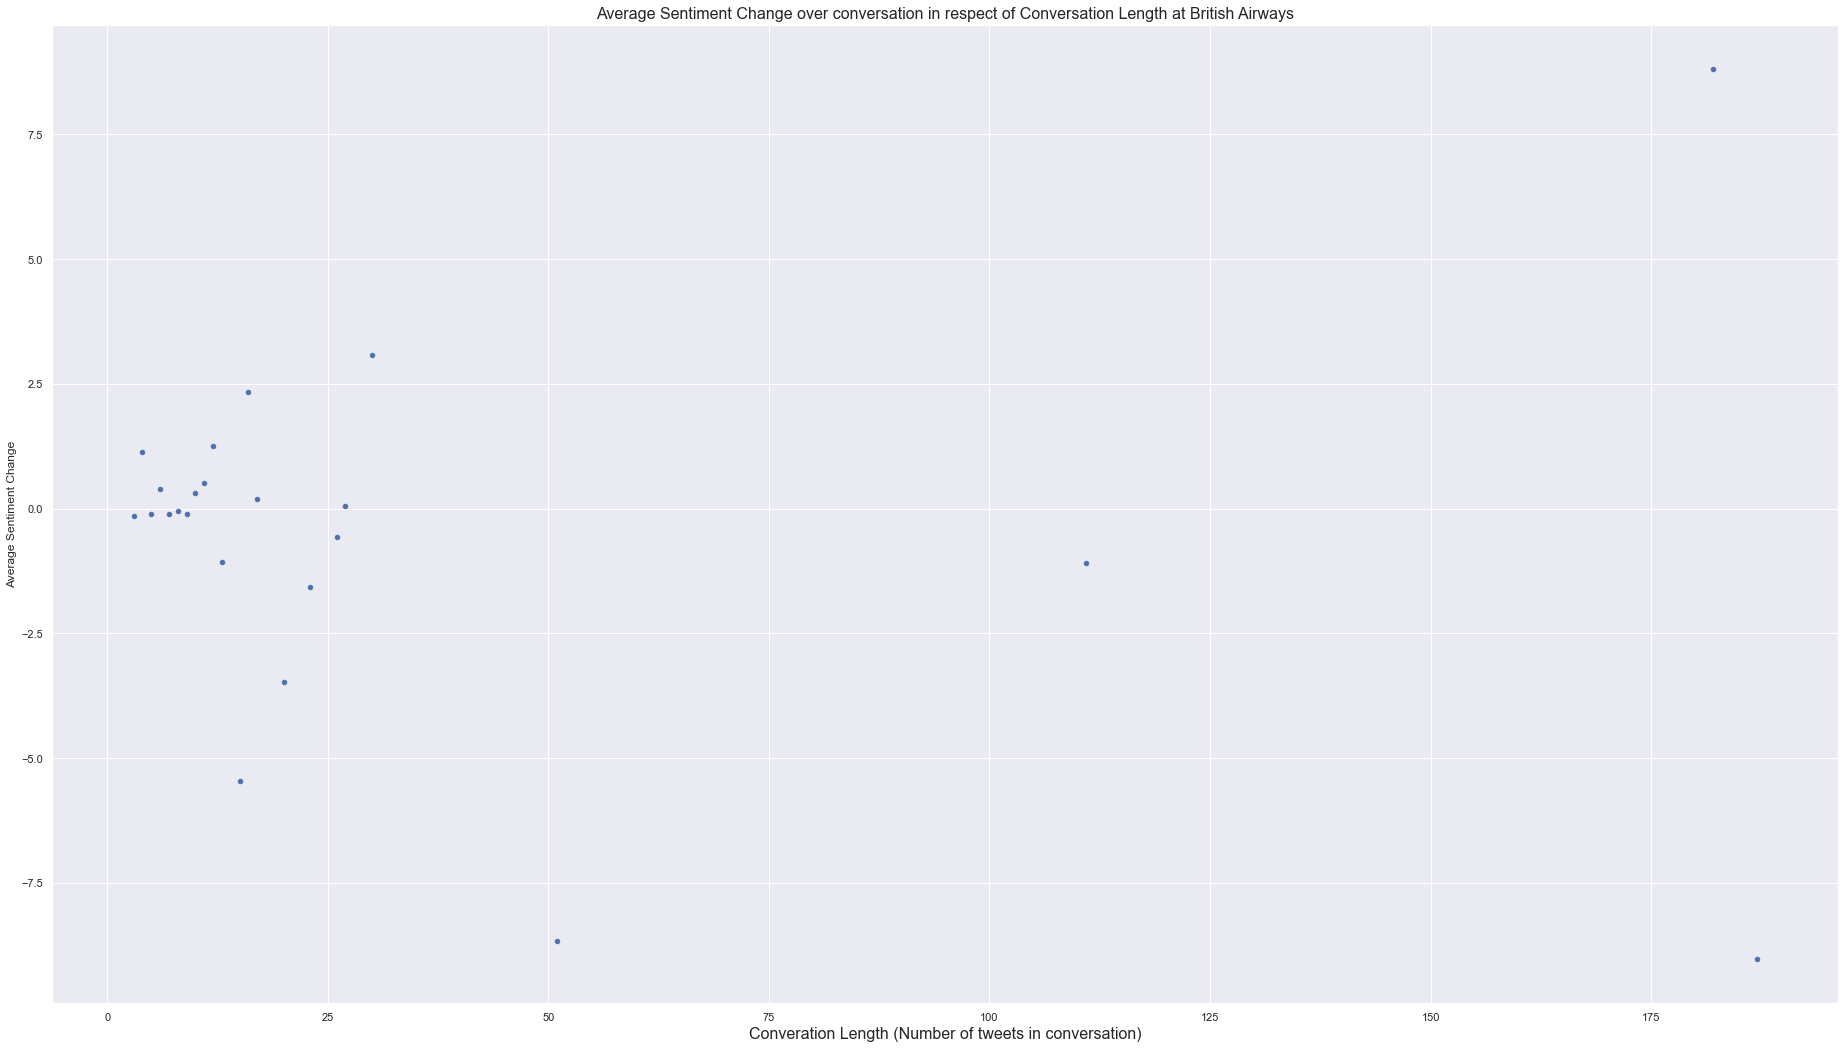

In [25]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # also improves the look of plots
sns.set()              # set Seaborn defaults
plt.rcParams['figure.figsize'] = [10, 5]   # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

plot_AF = df_AF.plot(kind='scatter', x= 'index', y=0, c="b", figsize=(32, 18))
plot_AF.set_title('Average Sentiment Change over conversation in respect of Conversation Length at British Airways', size = 16)
plot_AF.set_xlabel('Converation Length (Number of tweets in conversation)', size = 16)
plot_AF.set_ylabel('Average Sentiment Change');

In [ ]:
get_sentiment_change_mean("C:\\Users\\20211487\\index_testing\\conversations_total_AmericanAir.csv")


In [ ]:
get_sentiment_change_mean("C:\\Users\\20211487\\index_testing\\conversations_total_EtihadAirways.csv")


In [ ]:
get_sentiment_change_mean("C:\\Users\\20211487\\index_testing\\conversations_total_Lufthansa.csv")


In [ ]:
get_sentiment_change_mean("C:\\Users\\20211487\\index_testing\\conversations_total_Qantas.csv")


In [ ]:
get_sentiment_change_mean("C:\\Users\\20211487\\index_testing\\conversations_total_RyanAir.csv")


In [ ]:
get_sentiment_change_mean("C:\\Users\\20211487\\index_testing\\conversations_total_SingaporeAir.csv")
